In [29]:
import numpy as np
import pandas as pd
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [49]:
dataset = pd.read_csv('data/tips.csv')

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

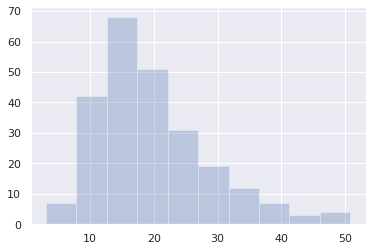

In [50]:
plt.hist(dataset['total_bill'],alpha = 0.3)
# sns.rugplot(dataset)

(0.0, 1.0)

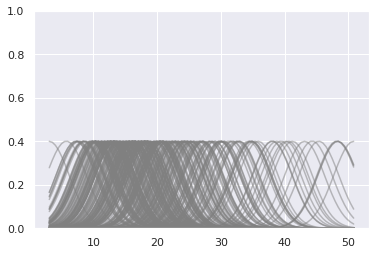

In [57]:
x_min = dataset['total_bill'].min()
x_max = dataset['total_bill'].max()

x_axis = np.linspace(x_min, x_max, 100)
bandwidth = ((4*dataset['total_bill'].std()**5)/(3*len(dataset['total_bill']))) ** 0.2
kernel_list = []

for data_point in dataset['total_bill']:

#create a kernel for each point and append it to the kernel list #

    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
#Scale for plotting 

    kernel = kernel/ kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color = 'grey', alpha = 0.5)
    
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the basis functions')

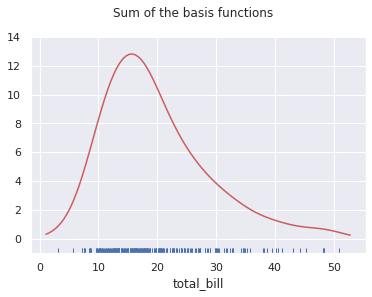

In [54]:
sum_of_kde = np.sum(kernel_list, axis =0)
fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')
sns.rugplot(dataset['total_bill'])
plt.suptitle("Sum of the basis functions")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

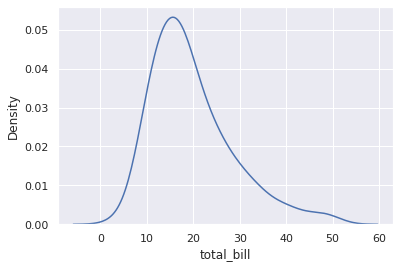

In [56]:
sns.kdeplot(dataset['total_bill'])

In [59]:
x_axis = np.linspace(x_min, x_max, 100)
len(x_axis)

100